In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classification-of-malwares/ClaMP_Integrated-5184.csv
/kaggle/input/classification-of-malwares/ClaMP_Raw-5184.csv


# Testing the major dimensionality reduction techniques on the popular Iris dataset 

In [2]:
from sklearn import datasets
 
iris = datasets.load_iris()
input_ads_pre = pd.DataFrame(iris.data, columns=iris.feature_names)
input_ads_pre['Target'] = iris.get('target')

#-------------------------------------------------------------------
print(input_ads_pre.shape)
input_ads_pre.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Separating the target column for our analysis (Since it is an dependent column in this use-case)

In [3]:
#ads_arr = np.array(input_ads_pre)
ads_arr = np.array(input_ads_pre)[:,:-1]
ads_arr_y = np.array(input_ads_pre)[:,-1]

#------------------------------------------------
print(ads_arr.shape)
print(ads_arr_y.shape)

(150, 4)
(150,)


# Scaling the features for the techniques further (We'll use standard scaling for this example)

In [4]:
from sklearn.preprocessing import StandardScaler

ads_arr_scaled = StandardScaler().fit_transform(ads_arr)
print(ads_arr_scaled.shape)
ads_arr_scaled[0]

(150, 4)


array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

# PCA (Principal Components Analysis)

In [5]:
from sklearn.decomposition import PCA

#------------------------------------------------------
pca = PCA()
principalComponents = pca.fit_transform(ads_arr_scaled)
principalComponents.shape

(150, 4)

### Explaining the variance distribution among the principal components

[Text(0.5, 0, 'Principal Component'),
 Text(0, 0.5, 'explained_variance_in_ratio'),
 Text(0.5, 1.0, 'Explained-variance vs Component Chart')]

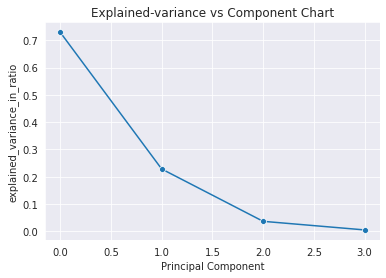

In [6]:
explained_var_ratio = pca.explained_variance_ratio_ #The explained variance for each principal component

#Plotting
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(len(explained_var_ratio)),y=explained_var_ratio,marker='o')
ax.set(xlabel='Principal Component',ylabel='explained_variance_in_ratio',title='Explained-variance vs Component Chart')

### Visualizing the first two components on 2-d chart

[Text(0.5, 0, 'Principal Component - 0'),
 Text(0, 0.5, 'Principal Component - 1'),
 Text(0.5, 1.0, 'Principal_Component-0 vs Principal_Component-1')]

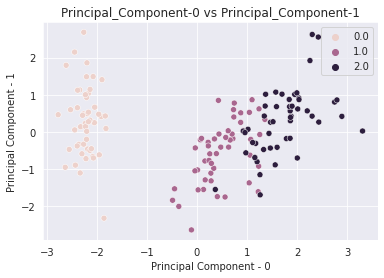

In [7]:
import seaborn as sns

ax = sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],hue=ads_arr_y)
ax.set(xlabel='Principal Component - 0',ylabel='Principal Component - 1',title='Principal_Component-0 vs Principal_Component-1')

### Insight - From the explained ratio we can see that principal component-0 explains ~73% of the data, while PC-1 explains ~23%. When combined, they explain 96% of the whole data and hence with minimal loss of data, we get two axis to visualize our data properly in the 2-d space

# t-SNE (Stochastic Neighbor Embedding with t-distribution) 

In [8]:
from sklearn.manifold import TSNE
 
tsne = TSNE(n_components=2,
            perplexity=np.sqrt(np.round(len(ads_arr_scaled),0)),
            learning_rate=10,
            n_iter=1000,
            n_iter_without_progress=300,
            min_grad_norm=1e-7,
            metric='euclidean',
            random_state=100,
            n_jobs=-1) #perplexity=sqrt(n)
 
tsne_embedded = tsne.fit_transform(ads_arr_scaled)

### Visualizing the lower dimensions of t-SNE transformation

[Text(0.5, 0, 'tsne-0'),
 Text(0, 0.5, 'tsne-1'),
 Text(0.5, 1.0, 'tsne-0 vs tsne-1')]

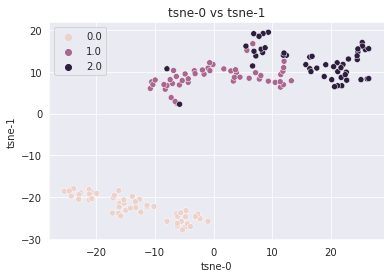

In [9]:
ax = sns.scatterplot(x=tsne_embedded[:,0],y=tsne_embedded[:,1],hue=ads_arr_y)
ax.set(xlabel='tsne-0',ylabel='tsne-1',title='tsne-0 vs tsne-1')

# UMAP (Uniform Manifold Approximation & Projection)

In [10]:
!pip install umap-learn

In [11]:
import umap
 
#---------------------------------------------------------
umap_embedding = umap.UMAP(n_components = 2,
                           n_neighbors=15,
                           min_dist=0.2,
                           metric='euclidean',
                           random_state=100)
 
#---------------------------------------------------------
umap_embed = umap_embedding.fit_transform(ads_arr_scaled)
umap_embed.shape

(150, 2)

### Visualizing the lower dimension after UMAP transformation

[Text(0.5, 0, 'umap-0'),
 Text(0, 0.5, 'umap-1'),
 Text(0.5, 1.0, 'umap-0 vs umap-1')]

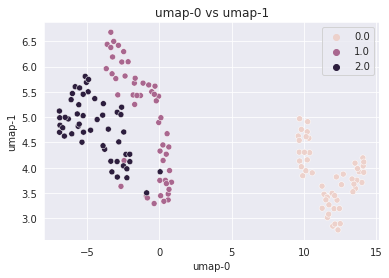

In [12]:
ax = sns.scatterplot(x=umap_embed[:,0],y=umap_embed[:,1],hue=ads_arr_y)
ax.set(xlabel='umap-0',ylabel='umap-1',title='umap-0 vs umap-1')

# 2-d comparison of all techniques 

[Text(0.5, 0, 'umap-0'),
 Text(0, 0.5, 'umap-1'),
 Text(0.5, 1.0, 'umap-0 vs umap-1')]

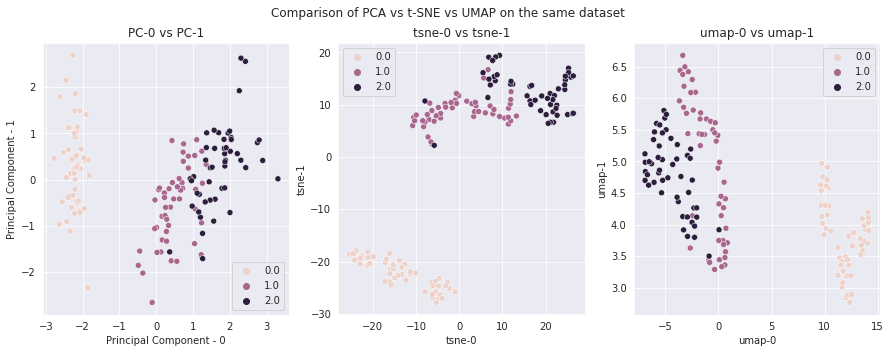

In [13]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(15,5))

#-----------------------------------------------------------------------
fig.suptitle('Comparison of PCA vs t-SNE vs UMAP on the same dataset')
axes[0].set_title('2-d PCA projection (Best 2 components)')
axes[1].set_title('2-d t-SNE projection ')
axes[2].set_title('2-d UMAP projection ')
    
#---------------------------------------------------------------------------------------------------------------------------------
ax = sns.scatterplot(ax=axes[0],x=principalComponents[:,0],y=principalComponents[:,1],hue=ads_arr_y)
ax.set(xlabel='Principal Component - 0',ylabel='Principal Component - 1',title='PC-0 vs PC-1')
#---------------------------------------------------------------------------------------------------------------------------------
ax = sns.scatterplot(ax=axes[1],x=tsne_embedded[:,0],y=tsne_embedded[:,1],hue=ads_arr_y)
ax.set(xlabel='tsne-0',ylabel='tsne-1',title='tsne-0 vs tsne-1')
#---------------------------------------------------------------------------------------------------------------------------------
ax = sns.scatterplot(ax=axes[2],x=umap_embed[:,0],y=umap_embed[:,1],hue=ads_arr_y)
ax.set(xlabel='umap-0',ylabel='umap-1',title='umap-0 vs umap-1')

# Insights : 
1. For Iris dataset, all the 3 techniques are performing dimensionality reduction in quite similar way, with the clusters being made out equally well
2. This notebook can be expanded on other datasets and similar comparisons can be made for exhaustive comparison (adjust hyper-params of t-SNE and UMAP accordingly)

# END